# Autoencoder vs PCA for Dimensionality Reduction

In [1]:
%matplotlib inline

In [18]:
import keras
import matplotlib.pyplot as plt
import numpy as np
import umap

from keras.datasets import mnist
from keras.layers import Dense
from keras.models import Model
from keras.models import Sequential
from keras.optimizers import Adam
from numpy.linalg import svd
from sklearn.manifold import TSNE

## Dataset MNIST

In [3]:
(X_train, y_train), (X_test, _) = mnist.load_data()

X_train = X_train.reshape(60000, 784) / 255
X_test = X_test.reshape(10000, 784) / 255

## PCA

In [13]:
%%time

n_pc = 2

mu = X_train.mean(axis=0)
U, s, V = svd(X_train - mu, full_matrices=False)
Z_pca = np.dot(X_train - mu, V.T)
R_pca = np.dot(Z_pca[:, :n_pc], V[:n_pc, :]) + mu

n_rows, n_cols = R_pca.shape

#  MSE
err = np.sum((X_train - R_pca)**2) * (n_rows * n_cols)**-1

print(f'loss: {err:.4}')

loss: 0.05595
CPU times: user 24.2 s, sys: 1.84 s, total: 26.1 s
Wall time: 11.1 s


## UMAP

In [ ]:
%% time

umap 

## Autoencoder

In [5]:
model = Sequential()
model.add(Dense(512, activation='elu', input_shape=(784, )))
model.add(Dense(128, activation='elu'))
model.add(Dense(2, activation='linear', name='bottleneck'))
model.add(Dense(128, activation='elu'))
model.add(Dense(512, activation='elu'))
model.add(Dense(784, activation='sigmoid'))
model.compile(loss='mean_squared_error', optimizer=Adam())

model.fit(X_train, X_train, batch_size=128, epochs=5, verbose=1, validation_data=(X_test, X_test))

encoder = Model(model.input, model.get_layer('bottleneck').output)

Z_model = encoder.predict(X_train)
R_model = model.predict(X_train)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 9s 148us/step - loss: 0.0564 - val_loss: 0.0481
Epoch 2/5
60000/60000 [==============================] - 8s 133us/step - loss: 0.0463 - val_loss: 0.0445
Epoch 3/5
60000/60000 [==============================] - 8s 132us/step - loss: 0.0436 - val_loss: 0.0424
Epoch 4/5
60000/60000 [==============================] - 8s 128us/step - loss: 0.0417 - val_loss: 0.0406
Epoch 5/5
60000/60000 [==============================] - 8s 129us/step - loss: 0.0404 - val_loss: 0.0400


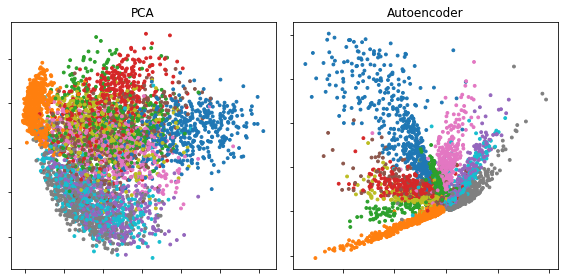

In [15]:
plt.figure(figsize=(8,4))
plt.subplot(121)
plt.title('PCA')
plt.scatter(Z_pca[:5000,0], Z_pca[:5000,1], c=y_train[:5000], s=8, cmap='tab10')
plt.gca().get_xaxis().set_ticklabels([])
plt.gca().get_yaxis().set_ticklabels([])

plt.subplot(122)
plt.title('Autoencoder')
plt.scatter(Z_model[:5000,0], Z_model[:5000,1], c=y_train[:5000], s=8, cmap='tab10')
plt.gca().get_xaxis().set_ticklabels([])
plt.gca().get_yaxis().set_ticklabels([])

plt.tight_layout()